In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

1. Загрузите изображение в оттенках серого sar_1_gray.jpg 

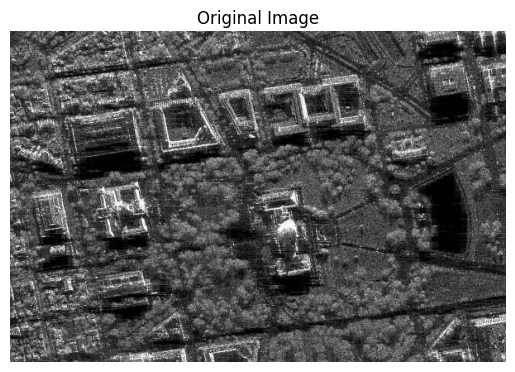

In [3]:
img = cv2.imread('sar_1_gray.jpg', cv2.COLOR_BGR2GRAY)


plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()    

2.  Постройте гистограмму

C:\Users\aderg\AppData\Local\Temp\ipykernel_20868\2199159279.py:1: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.ravel(), 256, [0, 256])


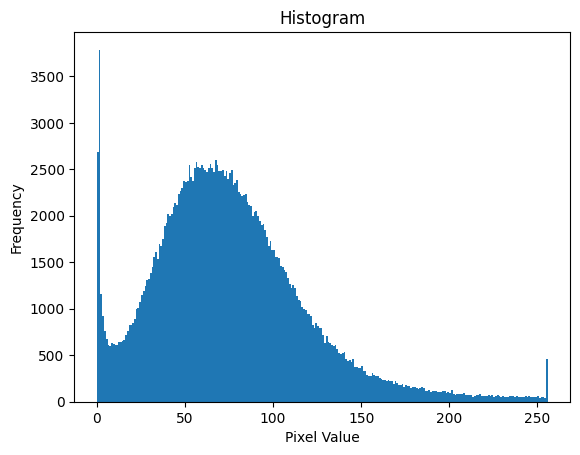

In [4]:
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, 1>

In [5]:
def gamma_correction(image, gamma):
    gamma_corrected = np.power(image / 255.0, gamma)
    gamma_corrected = np.uint8(gamma_corrected * 255)
    return gamma_corrected

In [6]:
gamma_low = 0.5
gamma_high = 1.5
img_gamma_low = gamma_correction(img, gamma_low)
img_gamma_high = gamma_correction(img, gamma_high)

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

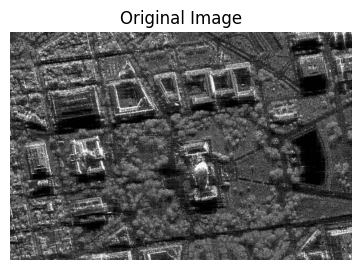

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

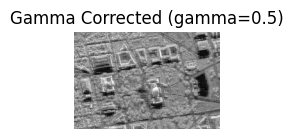

In [8]:
plt.subplot(1, 3, 2)
plt.imshow(img_gamma_low, cmap='gray')
plt.title(f'Gamma Corrected (gamma={gamma_low})')
plt.axis('off')

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

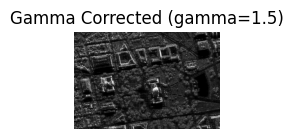

In [9]:
plt.subplot(1, 3, 3)
plt.imshow(img_gamma_high, cmap='gray')
plt.title(f'Gamma Corrected (gamma={gamma_high})')
plt.axis('off')

In [10]:
plt.show()

4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM    

In [11]:
def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

In [12]:
def calculate_ssim(image1, image2):
    return ssim(image1, image2)

In [13]:
mse_low = mse(img, img_gamma_low)
mse_high = mse(img, img_gamma_high)
ssim_low = calculate_ssim(img, img_gamma_low)
ssim_high = calculate_ssim(img, img_gamma_high)

In [14]:
print(f'MSE (gamma={gamma_low}): {mse_low}')
print(f'SSIM (gamma={gamma_low}): {ssim_low}')
print(f'MSE (gamma={gamma_high}): {mse_high}')
print(f'SSIM (gamma={gamma_high}): {ssim_high}')

MSE (gamma=0.5): 102.92194583333334
SSIM (gamma=0.5): 0.7875008686792753
MSE (gamma=1.5): 109.49745416666667
SSIM (gamma=1.5): 0.8065788107754002


5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray

In [20]:
eq_gray = cv2.imread('eq_gray.jpg', cv2.IMREAD_GRAYSCALE)


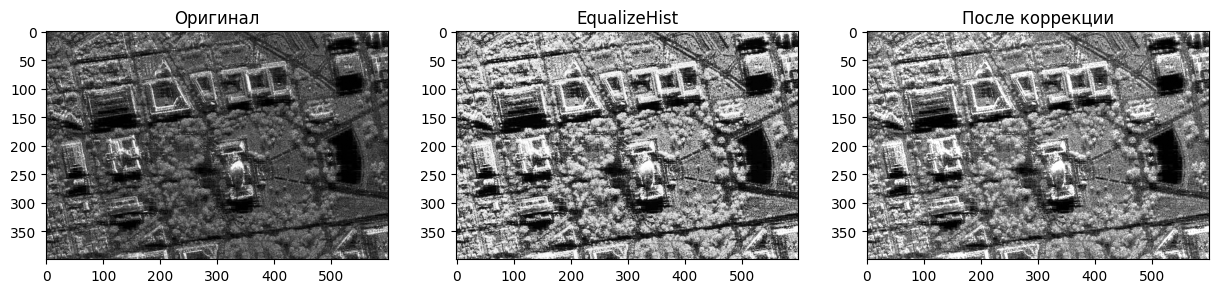

In [22]:
eq_gray = cv2.equalizeHist(img)
def stat_corr_algo(src, ref): 
    mean_src = src.mean()
    std_src = src.std()

    mean_ref = ref.mean()
    std_ref = ref.std()

    stat_corrected = (src - mean_src) * (std_ref/std_src) + mean_ref
    return np.clip(stat_corrected, 0, 255).astype(np.uint8)


image_matched = stat_corr_algo(img, eq_gray)

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img, cmap="gray"); axs[0].set_title("Оригинал")
axs[1].imshow(eq_gray, cmap="gray"); axs[1].set_title("ЕqualizeHist")
axs[2].imshow(image_matched, cmap="gray"); axs[2].set_title("После коррекции")
plt.show()

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

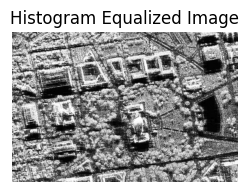

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(img_eq, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

In [ ]:
plt.show()

6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами

In [ ]:
_, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

In [ ]:
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

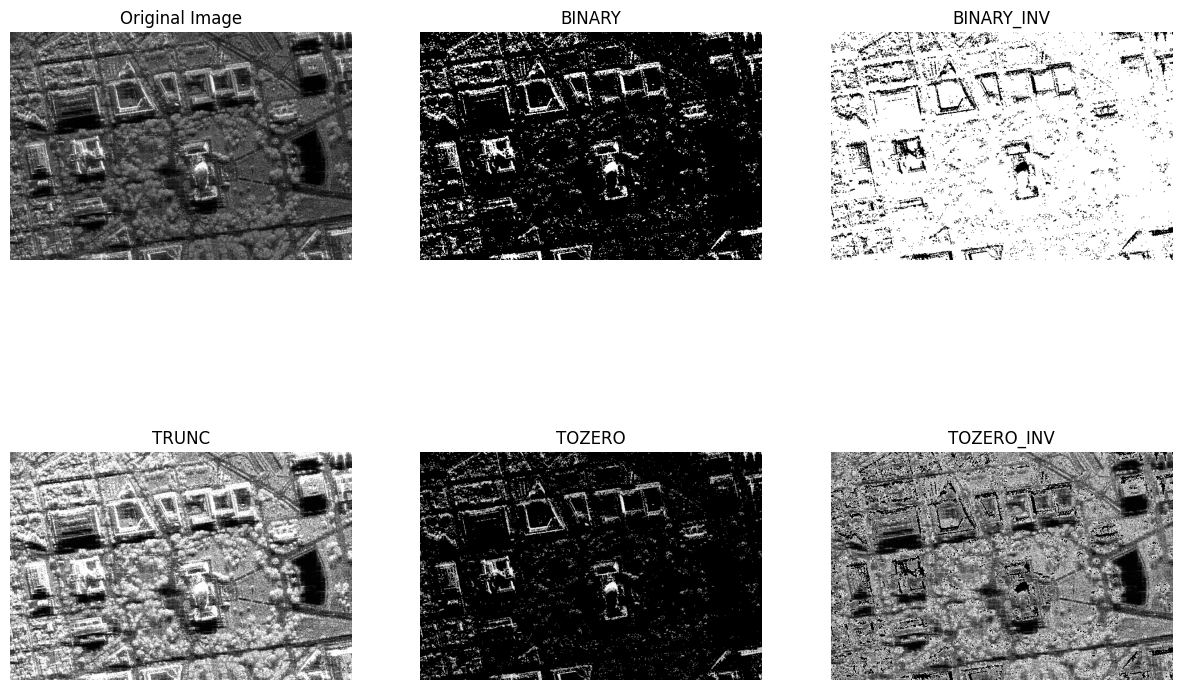

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

In [ ]:
plt.show()